In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats as st
from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.columns=['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_Type']
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.shape

(214, 11)

In [6]:
df.tail()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
df.columns.tolist()

['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_Type']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass_Type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


As we can see above that the data types for 9 columns are float and 2 are int

In [9]:
df.isnull().sum()

ID            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass_Type    0
dtype: int64

There are no null values in the dataset which can be validated by heatmap below

<Axes: >

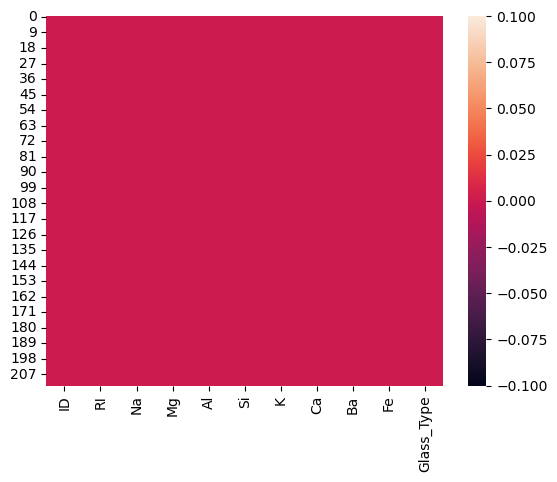

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.nunique().to_frame()

,0
ID,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


Here we can see that ID column has all unique values  and it does not add any value to the dataset, we can drop ID column. 
Glass_Type has 6 unique values which can be classified as window glass(1-4) and non-window glass(5-7)

In [12]:
df.drop('ID',axis=1,inplace=True)

In [13]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Now we have 214 rows and 10 columns

In [14]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


1.)As we can see that the total count in each column is 214 which means that there is no missing value.
2.)mean is greater than median in RI,Na,Al,Ca,Ba,Fe,Glass_Type which indicates positive skewness
3.)median is greater than mean in Mg,Si,K which indicates negative skewness
4.)The standard deviation is quite low which indicates the data spread is not far from mean.
5.)There is a significant difference in 75th percentile and max value in K,Ca which indicates the presence of outliers.

In [15]:
df.Glass_Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass_Type, dtype: int64

<Axes: xlabel='Glass_Type', ylabel='count'>

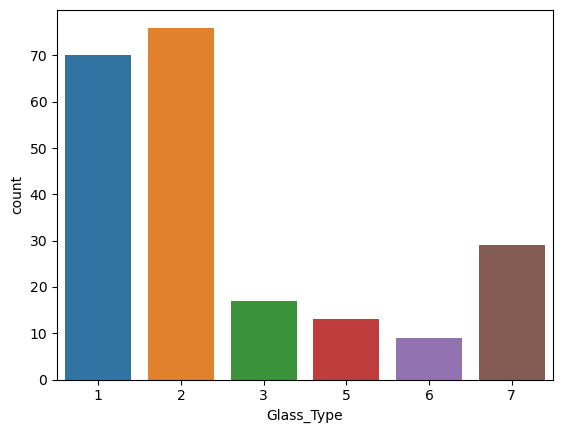

In [16]:
sns.countplot(data=df,x='Glass_Type')

Here we can see that in Glass_Type majority of the data is clustered between 1 and 2

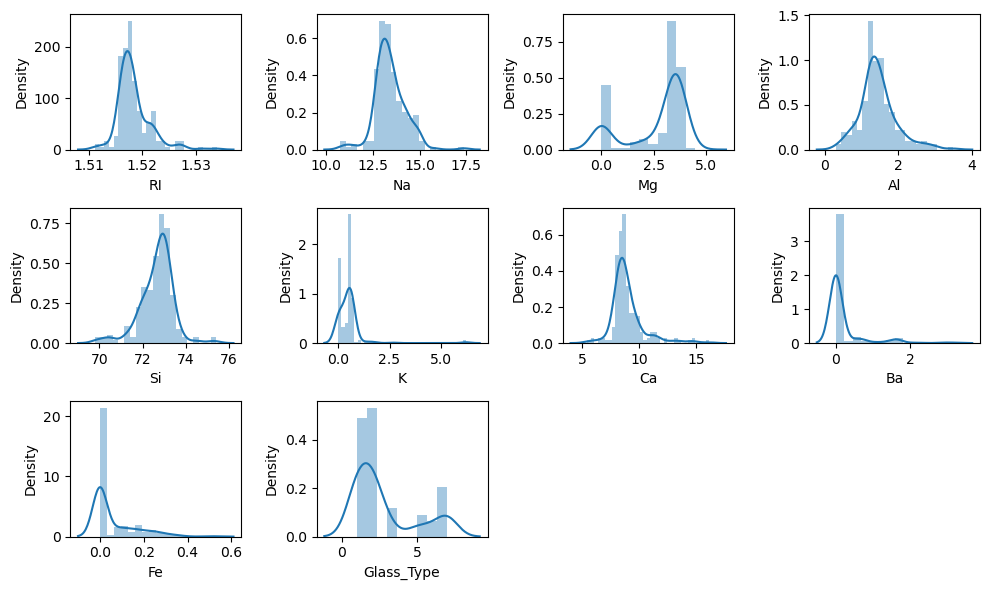

In [17]:
plt.figure(figsize=(10,6))
pltno=1
for col in df:
    if pltno<=10:
        ax=plt.subplot(3,4,pltno)
        sns.distplot(df[col])
    pltno+=1
plt.tight_layout()

We can observe above that skewness is present in the data

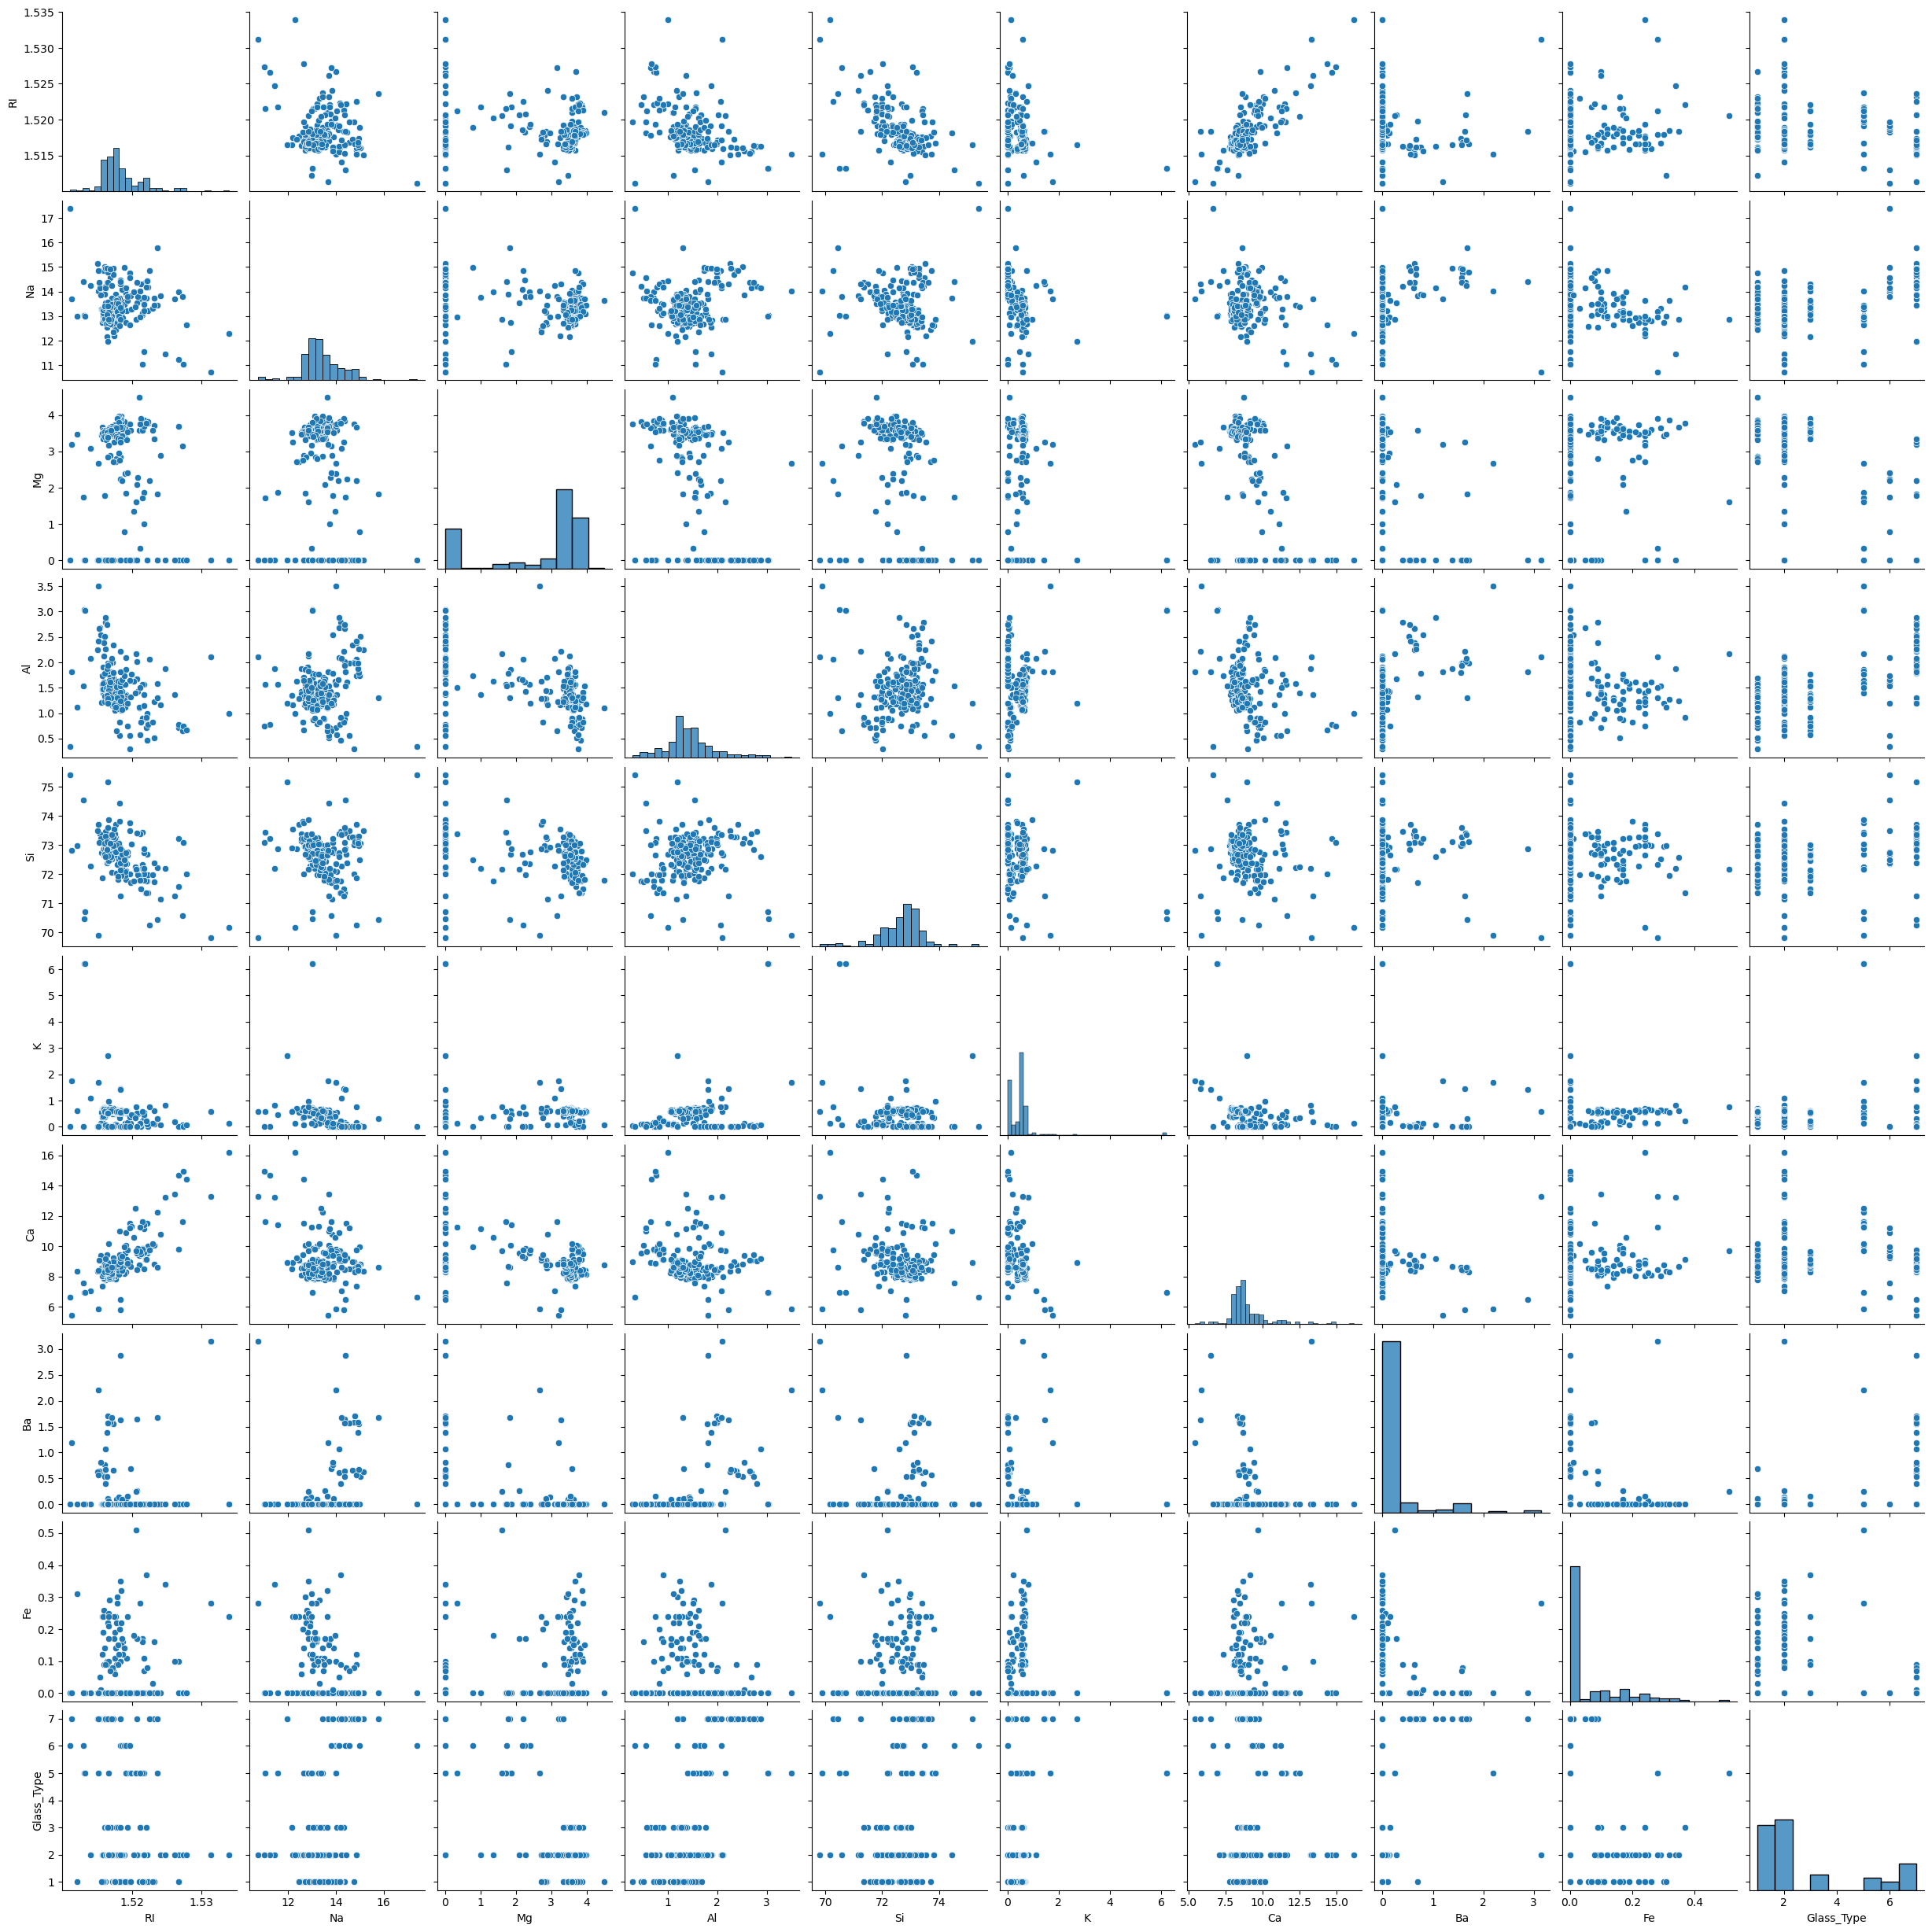

In [18]:
sns.pairplot(df)

Here we can see that refractive index increases with increase in calcium amd decreases with increase in silicon.
Magnesium increases with increase in Potassium.
Sodium is positively correlated to Aluminium, Silicon and Barium

<Axes: xlabel='Glass_Type', ylabel='RI'>

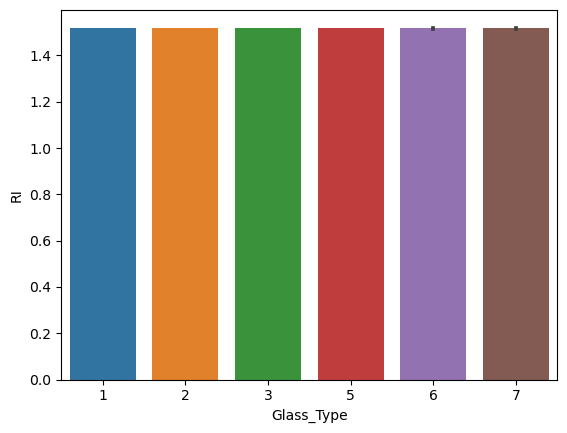

In [19]:
sns.barplot(x='Glass_Type',y='RI',data=df)

Here we can see that for all glass types . refractive index is the same.

<Axes: xlabel='Glass_Type', ylabel='Na'>

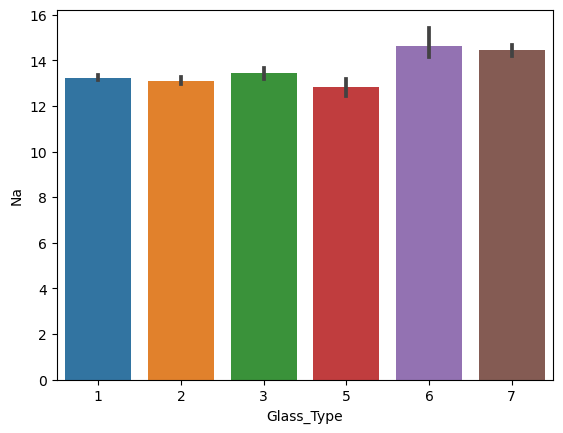

In [20]:
sns.barplot(x='Glass_Type',y='Na',data=df)

Here we can see that Sodium level is more in glass type 6 nad 7 as compared to others

<Axes: xlabel='Glass_Type', ylabel='Mg'>

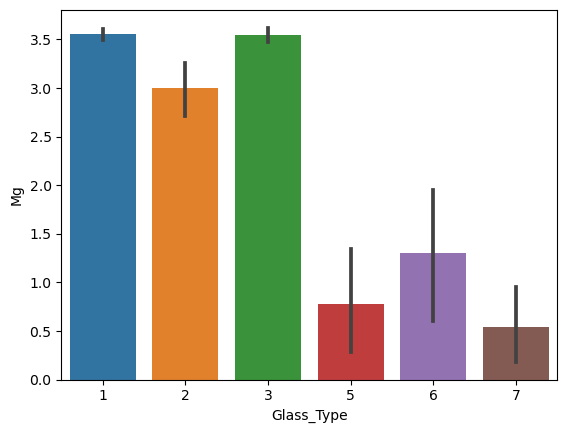

In [21]:
sns.barplot(x='Glass_Type',y='Mg',data=df)

We can see that Magnesium is higher in glass type 1,2 and 3 and lower in 5,6,7

<Axes: xlabel='Glass_Type', ylabel='Al'>

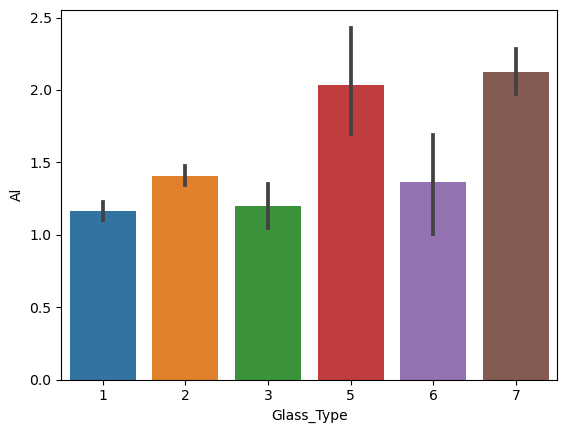

In [22]:
sns.barplot(x='Glass_Type',y='Al',data=df)

Here we can see that Al level is loe in 1,3 and high in 5,7 while it is same for 2 and 6

<Axes: xlabel='Glass_Type', ylabel='Si'>

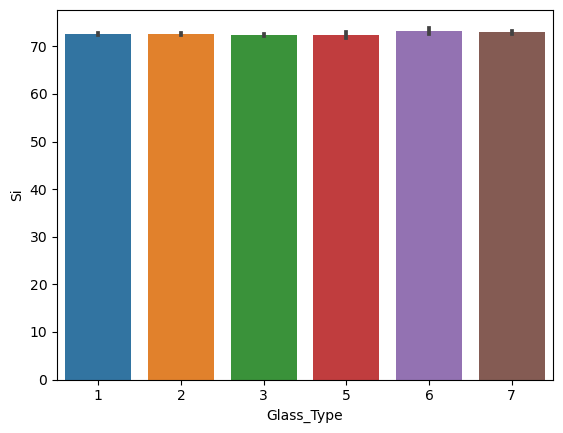

In [23]:
sns.barplot(x='Glass_Type',y='Si',data=df)

Silicon is equal in all the glass types

<Axes: xlabel='Glass_Type', ylabel='K'>

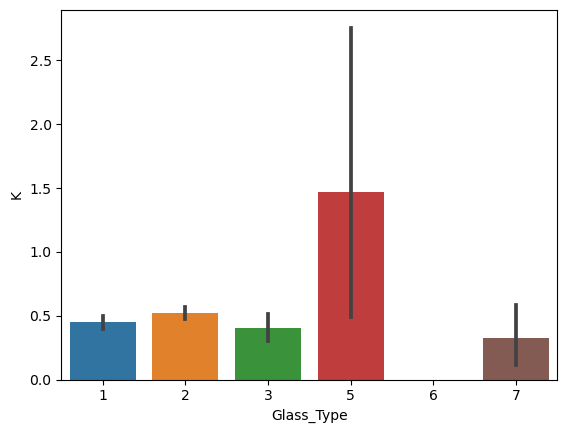

In [24]:
sns.barplot(x='Glass_Type',y='K',data=df)

Potassium is high in glass type 5 and there is no potassium in type 6

<Axes: xlabel='Glass_Type', ylabel='Ca'>

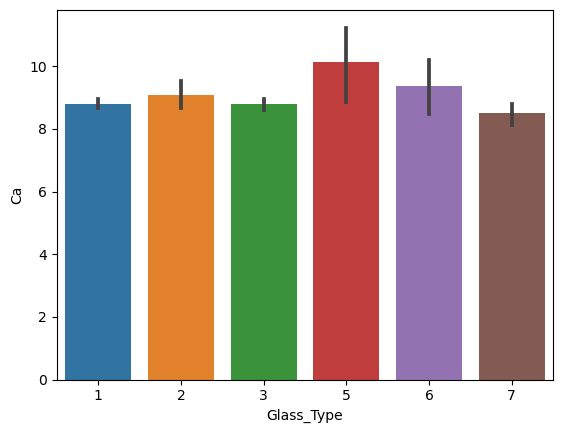

In [25]:
sns.barplot(x='Glass_Type',y='Ca',data=df)

Calcium is highest in type 5 and 6 and 1,2,3 and 6 have all similar levels of calcium

<Axes: xlabel='Glass_Type', ylabel='Ba'>

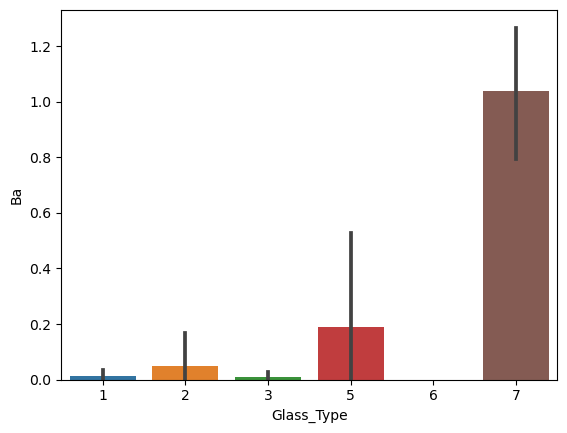

In [26]:
sns.barplot(x='Glass_Type',y='Ba',data=df)

Barium is highest in type 7 and there is no Barium in type 6. 1,2 and 3 have very less Barium content

<Axes: xlabel='Glass_Type', ylabel='Fe'>

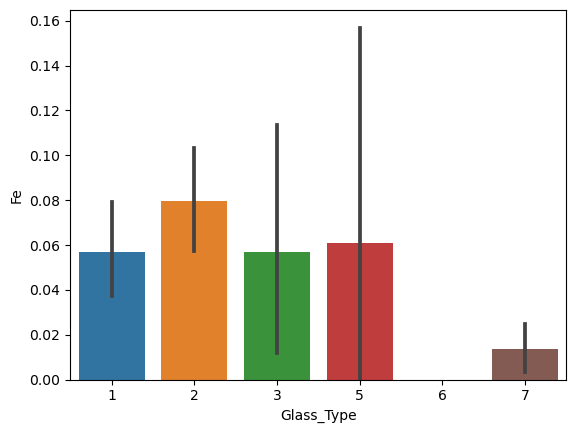

In [27]:
sns.barplot(x='Glass_Type',y='Fe',data=df)

Iron is not there in type 6 and type 7 has very less Iron

In [28]:
dfcor=df.corr()
dfcor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Glass_Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

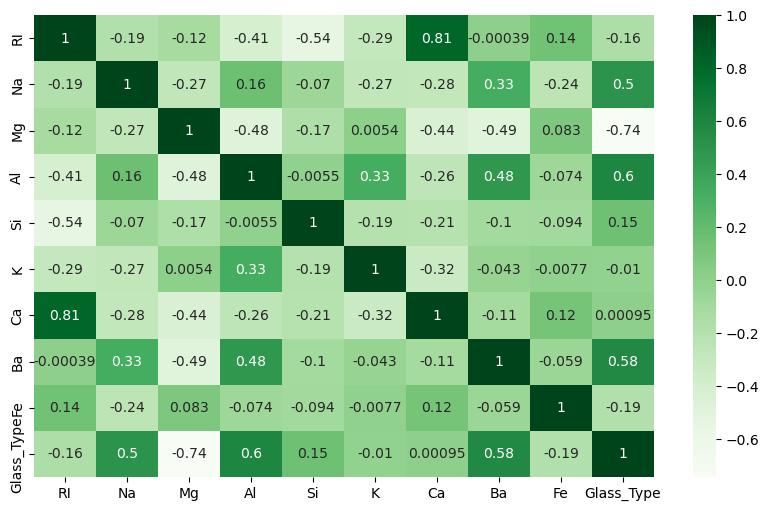

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True,cmap='Greens')

Above heatmap shows the correlation between all columns.
Aluminium,Sodium and Barium are positively correlated with Glass type
Mg is negatively correlated with Glass type
Calcium is strongly positively correlated with Refractive Index
Aluminium and Barium are positively correlated
Refractive Index in negatively correlated with Silicon
Magnesium is negatively correlated with Calcium,Barium,and Aluminium

Here we can see that window glass type is 163 while non-window glass type is 51

In [34]:
#plt.figure(figsize=(5,6))
#z=1
#for i in df:
 #   if z<=9:
  #      sns.barplot(x='Glass_Type',y=i,data=df)
   #     plt.show()
    #    z+=1

Here we can see that:
1.) Sodium is same in both type of glass which indicates that sodium is primary ingrediant in glass
2.)Mg is more in Windows glass 
3.)Aluminium is more in non window glass
4.) Silicon is same in both type of glass.
5.) Potassium is little less in window glass
6.) Calcium is same in both type
7.) Barium is verly less in window glass
8.) Iron is more in Window glass


In [35]:
#sns.scatterplot(x='Na',y='Si',hue='Glass_Type',data=df,palette='Dark2')

Here we can see the glass type with respect to Na and Si.

RI               Axes(0.125,0.653529;0.168478x0.226471)
Na            Axes(0.327174,0.653529;0.168478x0.226471)
Mg            Axes(0.529348,0.653529;0.168478x0.226471)
Al            Axes(0.731522,0.653529;0.168478x0.226471)
Si               Axes(0.125,0.381765;0.168478x0.226471)
K             Axes(0.327174,0.381765;0.168478x0.226471)
Ca            Axes(0.529348,0.381765;0.168478x0.226471)
Ba            Axes(0.731522,0.381765;0.168478x0.226471)
Fe                   Axes(0.125,0.11;0.168478x0.226471)
Glass_Type        Axes(0.327174,0.11;0.168478x0.226471)
dtype: object

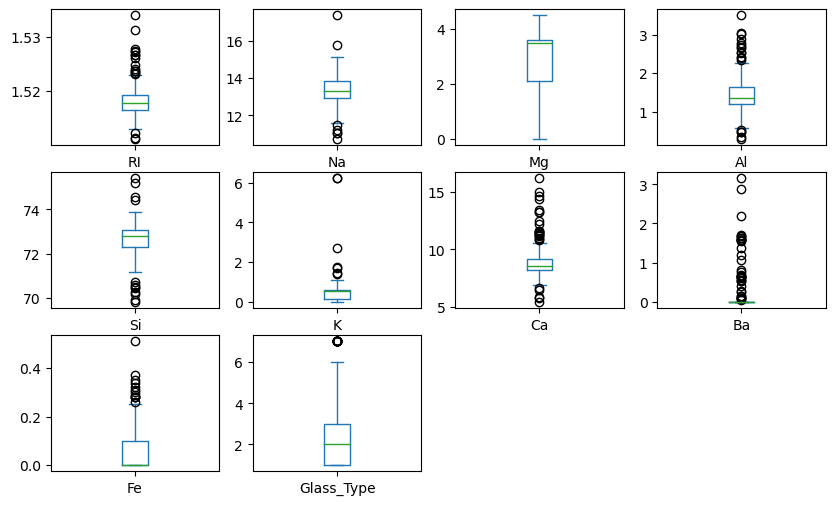

In [36]:
df.plot(kind='box',subplots= True,layout=(3,4),figsize=(10,6))

Above box plot shows that there are outliers present in the dataset except in Glass_Type and Mg

In [37]:
#Now we will remove the outliers
z=np.abs(zscore(df[['RI','Na','Al','Si','K','Ca','Ba','Fe']]))
z

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [38]:
#threshold=3
np.where(z>3)

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
        131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
        188, 189, 201, 201, 203, 207, 213], dtype=int64),
 array([5, 0, 1, 3, 5, 6, 0, 3, 5, 5, 5, 0, 5, 5, 7, 7, 2, 3, 6, 2, 4, 2,
        4, 7, 1, 3, 3, 6, 3, 4, 6, 6, 6], dtype=int64))

In [39]:
#removing outliers and creating a new dataframe without outliers
df1=df[(z<3).all(axis=1)]
df1.shape

(194, 10)

In [40]:
print("Old dataframe shape:",df.shape[0])
print("New dataframe shape:",df1.shape[0])

Old dataframe shape: 214
New dataframe shape: 194


In [41]:
print("Data Loss % =",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss % = 9.345794392523365


Data loss is approx 9.3% which is high considering the total amount of data is only 214 rows. So basically we are loosing 20 rows

In [42]:
#skewness removal
df.skew()

RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
Ba            3.416425
Fe            1.754327
Glass_Type    1.114915
dtype: float64

In [43]:
from scipy.stats import boxcox,yeojohnson

In [44]:
df['RI']=np.log(df['RI'])

In [45]:
df['Mg']=yeojohnson(df['Mg'],3)

In [46]:
df['Mg']=yeojohnson(df['Mg'],2)

In [47]:
df['Al']=np.cbrt(df['Al'])

In [48]:
df['Si']=yeojohnson(df['Si'],3)

In [49]:
df['Si']=yeojohnson(df['Si'],2)

In [50]:
df['Ca']=np.cbrt(df['Ca'])

In [51]:
df['Ca']=np.log(df['Ca'])

In [52]:
df['Ca']=np.log(df['Ca'])

In [53]:
df['Ba']=np.cbrt(df['Ba'])

In [54]:
df['Ba']=np.cbrt(df['Ba'])

In [55]:
df['Fe']=np.cbrt(df['Fe'])

In [56]:
df['Fe']=np.cbrt(df['Fe'])

In [57]:
df['Fe']=np.sqrt(df['Fe'])

In [58]:
df.skew()

RI            1.612865
Na            0.454181
Mg            0.059087
Al           -0.204132
Si           -0.375654
K             6.551648
Ca            0.567439
Ba            1.756306
Fe            0.747660
Glass_Type    1.114915
dtype: float64

In [59]:
df1.skew()

RI            0.952733
Na            0.371482
Mg           -1.528849
Al            0.658259
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            3.188587
Fe            1.486479
Glass_Type    1.284007
dtype: float64

In [60]:
df1['RI']=np.log(df1['RI'])

In [61]:
df1['Mg']=yeojohnson(df1['Mg'],3)

In [62]:
df1['Mg']=yeojohnson(df1['Mg'],2)

In [63]:
df1['Al']=np.cbrt(df1['Al'])

In [64]:
df1['Ca']=np.cbrt(df1['Ca'])

In [65]:
df1['Ba']=np.cbrt(df1['Ba'])

In [66]:
df1['Fe']=np.cbrt(df1['Fe'])

In [67]:
df1['Fe']=np.cbrt(df1['Fe'])

In [68]:
df1.skew()

RI            0.945701
Na            0.371482
Mg           -0.030498
Al           -0.374978
Si           -0.425450
K             0.303175
Ca            0.611914
Ba            2.207594
Fe            0.772399
Glass_Type    1.284007
dtype: float64

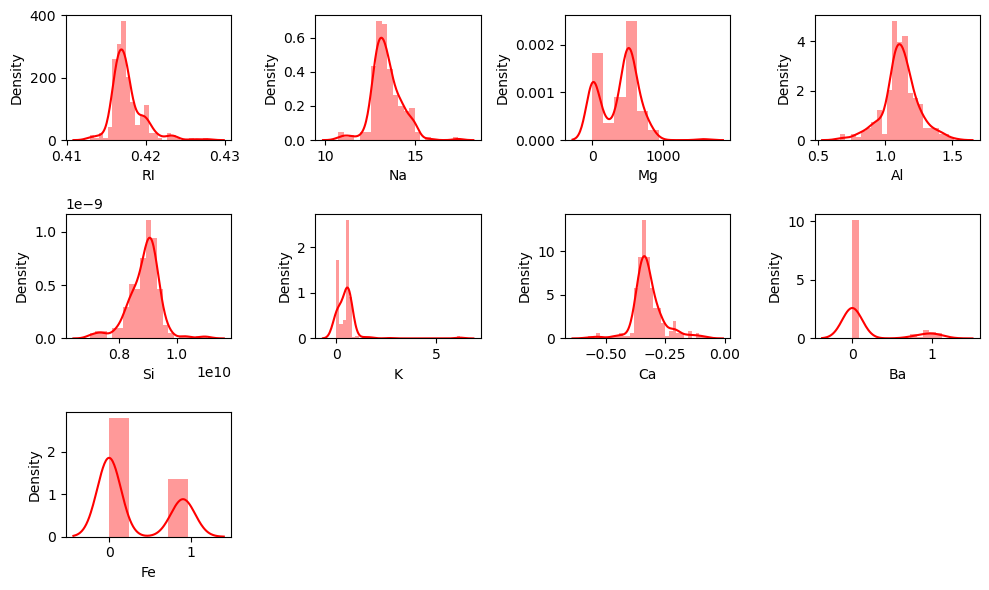

In [69]:
#To check skewness in df after transformation
plt.figure(figsize=(10,6))
plotnumber=1
for col in df:
    if plotnumber<=9:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[col],color='r')
    plotnumber+=1
plt.tight_layout()    

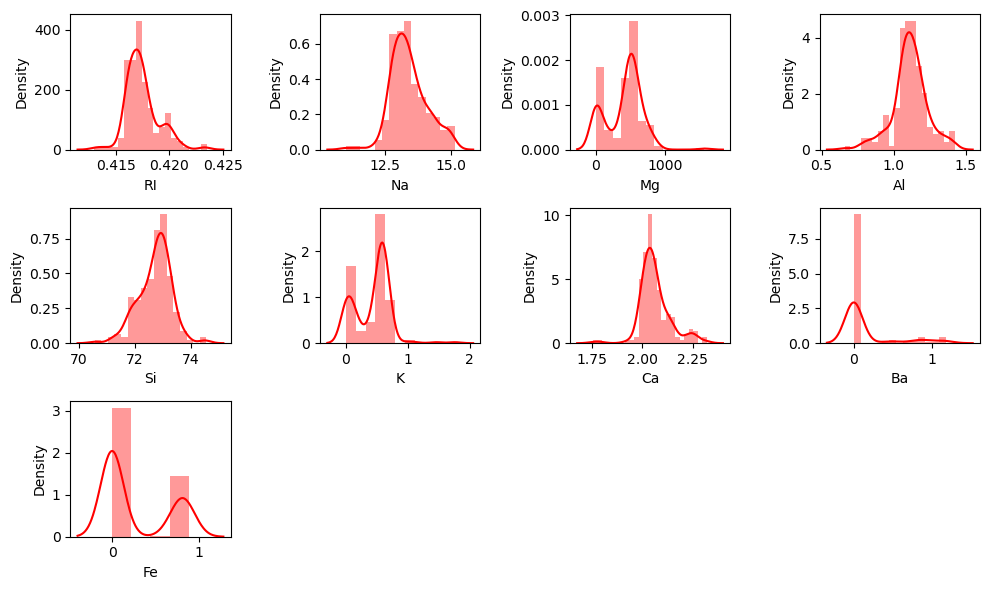

In [70]:
#To check skewness in df1 after transformation
plt.figure(figsize=(10,6))
plotnumber=1
for col in df1:
    if plotnumber<=9:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[col],color='r')
    plotnumber+=1
plt.tight_layout()    

Here we can see that the skewness has reduced and the data is almost normally distributed

In [71]:
dfcor['Glass_Type'].sort_values(ascending=False)

Glass_Type    1.000000
Al            0.598829
Ba            0.575161
Na            0.502898
Si            0.151565
Ca            0.000952
K            -0.010054
RI           -0.164237
Fe           -0.188278
Mg           -0.744993
Name: Glass_Type, dtype: float64

In [72]:
df1cor=df1.corr()
df1cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
RI,1.000000,0.050556,0.116798,-0.551754,-0.608867,-0.368230,0.690666,-0.226166,0.026662,-0.167534
Na,0.050556,1.000000,-0.290592,0.153264,-0.234718,-0.612183,0.017997,0.547500,-0.133991,0.533025
Mg,0.116798,-0.290592,1.000000,-0.519547,-0.416300,0.286730,-0.381286,-0.499844,0.065796,-0.709056
Al,-0.551754,0.153264,-0.519547,1.000000,0.351605,0.101983,-0.266408,0.526273,-0.051626,0.591653
Si,-0.608867,-0.234718,-0.416300,0.351605,1.000000,0.072579,-0.160134,0.183301,-0.002400,0.262152
K,-0.368230,-0.612183,0.286730,0.101983,0.072579,1.000000,-0.526657,-0.294253,0.027253,-0.383499
Ca,0.690666,0.017997,-0.381286,-0.266408,-0.160134,-0.526657,1.000000,-0.148491,0.022119,0.136273
Ba,-0.226166,0.547500,-0.499844,0.526273,0.183301,-0.294253,-0.148491,1.000000,-0.011893,0.701027
Fe,0.026662,-0.133991,0.065796,-0.051626,-0.002400,0.027253,0.022119,-0.011893,1.000000,-0.161189
Glass_Type,-0.167534,0.533025,-0.709056,0.591653,0.262152,-0.383499,0.136273,0.701027,-0.161189,1.000000


<Axes: >

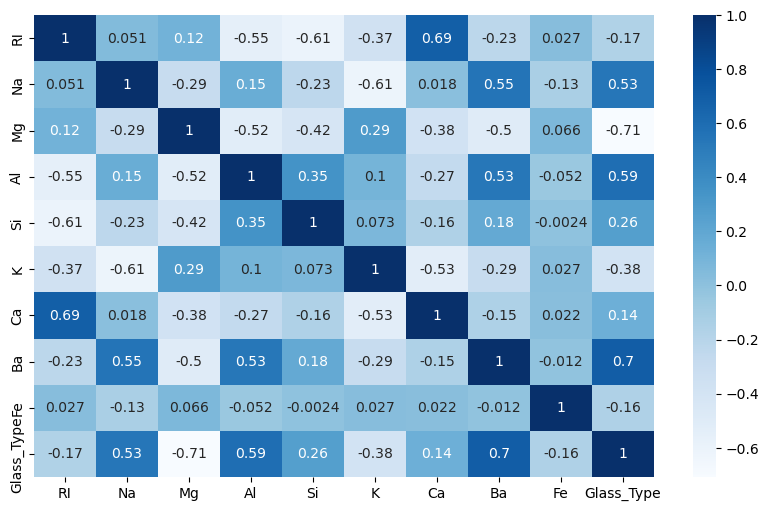

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(df1cor,annot=True,cmap='Blues')

In [76]:
df1cor['Glass_Type'].sort_values(ascending=False)

Glass_Type    1.000000
Ba            0.701027
Al            0.591653
Na            0.533025
Si            0.262152
Ca            0.136273
Fe           -0.161189
RI           -0.167534
K            -0.383499
Mg           -0.709056
Name: Glass_Type, dtype: float64

In [132]:
#spliting the variables
x=df.drop('Glass_Type',axis=1)
y=df['Glass_Type']

In [78]:
x.shape

(214, 9)

In [79]:
y.shape

(214,)

In [133]:
#df1
x1=df1.drop('Glass_Type',axis=1)
y1=df1['Glass_Type']

In [81]:
x1.shape

(194, 9)

In [82]:
y1.shape

(194,)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#df
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.874501,0.284953,4.391014,-0.634449,-1.137767,-0.671705,-0.056275,-0.461130,-0.696618
1,-0.248798,0.591817,0.631620,-0.057329,0.077811,-0.026213,-0.872841,-0.461130,-0.696618
2,-0.721996,0.149933,0.504662,0.300216,0.424417,-0.164533,-0.921265,-0.461130,-0.696618
3,-0.232260,-0.242853,0.877999,-0.204901,-0.080113,0.112107,-0.510261,-0.461130,-0.696618
4,-0.311644,-0.169205,0.684347,-0.313611,0.545823,0.081369,-0.646643,-0.461130,-0.696618
...,...,...,...,...,...,...,...,...,...
209,-0.705443,0.898681,-1.407215,2.344370,-0.080113,-0.640968,0.283497,2.263954,-0.696618
210,-0.500232,1.856097,-1.407215,1.086101,0.518780,-0.763919,-0.351368,2.389531,-0.696618
211,0.755683,1.168721,-1.407215,1.134079,1.011174,-0.763919,-0.316737,2.399355,-0.696618
212,-0.612757,1.193270,-1.407215,1.005054,1.275894,-0.763919,-0.282347,2.385524,-0.696618


In [84]:
#df1
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.292192,0.332127,4.486261,-0.666678,-1.612464,-1.319609,-0.041137,-0.415308,-0.691434
1,-0.197250,0.704398,0.541809,-0.035036,0.016082,0.172091,-1.038165,-0.415308,-0.691434
2,-0.824689,0.168328,0.408601,0.356287,0.461790,-0.147559,-1.094542,-0.415308,-0.691434
3,-0.175322,-0.308179,0.800315,-0.196550,-0.189629,0.491741,-0.606457,-0.415308,-0.691434
4,-0.280582,-0.218834,0.597131,-0.315529,0.616073,0.420708,-0.770849,-0.415308,-0.691434
...,...,...,...,...,...,...,...,...,...
189,-0.728121,1.419158,-1.597390,2.397864,0.221793,-1.532708,0.671549,2.070338,-0.691434
190,-0.802740,1.076668,-1.597390,2.593556,-0.189629,-1.248575,0.400966,2.696958,-0.691434
191,-0.530640,2.238153,-1.597390,1.216416,0.581788,-1.532708,-0.411806,3.147347,-0.691434
192,1.134644,1.404267,-1.597390,1.268927,1.198921,-1.532708,-0.368929,3.184306,-0.691434


In [86]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Values
0,RI,7.021553
1,Na,2.415687
2,Mg,3.882529
3,Al,2.936459
4,Si,3.641902
5,K,2.579955
6,Ca,5.905305
7,Ba,2.254553
8,Fe,1.072663


In [85]:
#Checking vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x1.columns
vif['Values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif

,Features,Values
0,RI,5.067125
1,Na,4.217940
2,Mg,4.876742
3,Al,2.613791
4,Si,3.543258
5,K,3.992732
6,Ca,6.532703
7,Ba,2.553278
8,Fe,1.042409


Since vif is in range we will not remove any column

Now we will categorise the glass type into window glass 1-4, and non window glass 5-7

In [87]:
df['Glass_Type']=pd.cut(df['Glass_Type'],bins=(0.5,4.5,7),labels=["Window","Non_Window"])

In [89]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,0.419375,13.64,1557.606437,1.032280,8.256658e+09,0.06,-0.324321,0.0,0.0,Window
1,0.417137,13.89,547.702272,1.107932,8.924774e+09,0.48,-0.376896,0.0,0.0,Window
2,0.416194,13.53,513.596809,1.154800,9.115279e+09,0.39,-0.380014,0.0,0.0,Window
3,0.417170,13.21,613.888058,1.088587,8.837975e+09,0.57,-0.353551,0.0,0.0,Window
4,0.417012,13.27,561.866615,1.074337,9.182007e+09,0.55,-0.362332,0.0,0.0,Window


In [90]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
209,0.416227,14.14,0.0,1.422757,8.837975e+09,0.08,-0.302445,1.006495,0.0,Non_Window
210,0.416636,14.92,0.0,1.257818,9.167143e+09,0.00,-0.343321,1.052877,0.0,Non_Window
211,0.419138,14.36,0.0,1.264107,9.437777e+09,0.00,-0.341091,1.056505,0.0,Non_Window
212,0.416412,14.38,0.0,1.247194,9.583274e+09,0.00,-0.338877,1.051397,0.0,Non_Window
213,0.416807,14.23,0.0,1.276501,9.392215e+09,0.00,-0.331246,1.058635,0.0,Non_Window


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Glass_Type']=le.fit_transform(df['Glass_Type'])


1    163
0     51
Name: Glass_Type, dtype: int64

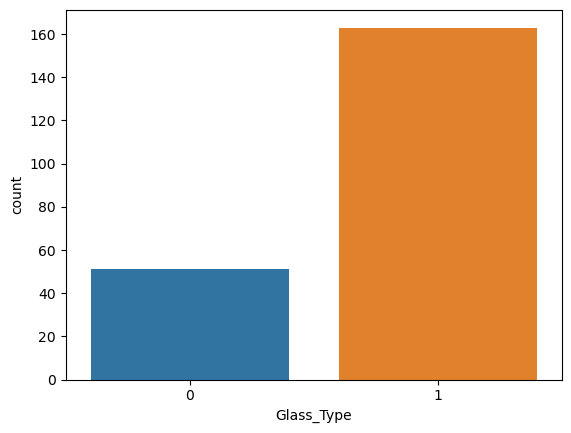

In [98]:
sns.countplot(data=df,x='Glass_Type')
df.Glass_Type.value_counts()

In [110]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_Type
0,0.419375,13.64,1557.606437,1.032280,8.256658e+09,0.06,-0.324321,0.000000,0.0,1
1,0.417137,13.89,547.702272,1.107932,8.924774e+09,0.48,-0.376896,0.000000,0.0,1
2,0.416194,13.53,513.596809,1.154800,9.115279e+09,0.39,-0.380014,0.000000,0.0,1
3,0.417170,13.21,613.888058,1.088587,8.837975e+09,0.57,-0.353551,0.000000,0.0,1
4,0.417012,13.27,561.866615,1.074337,9.182007e+09,0.55,-0.362332,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,0.416227,14.14,0.000000,1.422757,8.837975e+09,0.08,-0.302445,1.006495,0.0,0
210,0.416636,14.92,0.000000,1.257818,9.167143e+09,0.00,-0.343321,1.052877,0.0,0
211,0.419138,14.36,0.000000,1.264107,9.437777e+09,0.00,-0.341091,1.056505,0.0,0
212,0.416412,14.38,0.000000,1.247194,9.583274e+09,0.00,-0.338877,1.051397,0.0,0


As we can see that there is a big difference between window and non window glass we will use oversampling

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
SM=SMOTE()

In [148]:
xn,yn=SM.fit_resample(x,y)

In [149]:
#checking value counts
yn.value_counts()

1    163
0    163
Name: Glass_Type, dtype: int64

In [136]:
df['Glass_Type'].nunique()

2

In [137]:
df1['Glass_Type']=pd.cut(df1['Glass_Type'],bins=(0.5,4.5,7),labels=["Window","Non_Window"])

In [138]:
df1['Glass_Type']=le.fit_transform(df1['Glass_Type'])

1    154
0     40
Name: Glass_Type, dtype: int64

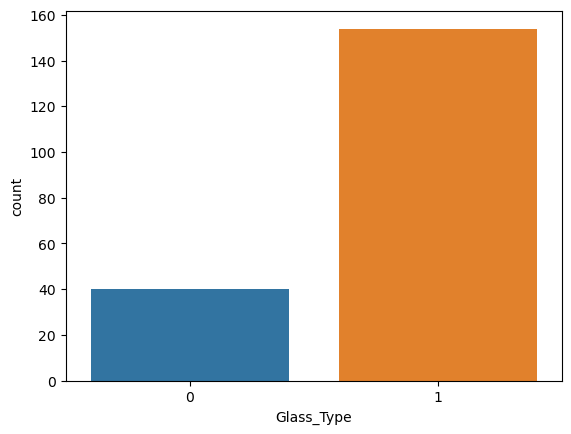

In [139]:
sns.countplot(data=df1,x='Glass_Type')
df1.Glass_Type.value_counts()

In [140]:
xn1,yn1=SM.fit_resample(x1,y1)

In [141]:
yn1.value_counts()

0    154
1    154
Name: Glass_Type, dtype: int64

In [116]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [151]:
#finding best random state in df
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(xn,yn,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best Accuracy is",maxAccu,"at random state", maxRS)

Best Accuracy is 1.0 at random state 12


In [143]:
#finding best random state in df1
maxAccu1=0
maxRS1=0
for i in range(1,200):
    a_train,a_test,b_train,b_test=train_test_split(xn1,yn1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(a_train,b_train)
    pred=RFR.predict(a_test)
    accu1=accuracy_score(b_test,pred)
    if accu1>maxAccu1:
        maxAccu1=accu1
        maxRS1=i
print("Best Accuracy is",maxAccu1,"at random state", maxRS1)

Best Accuracy is 1.0 at random state 19


# MODEL BUILDING WITH ORIGINAL DATASET

Creating train_test_split

In [152]:
x_train,x_test,y_train,y_test=train_test_split(xn,yn,test_size=0.30,random_state=maxRS)

RANDOM FOREST CLASSIFIER

In [153]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
predRFC
acc_RFC=accuracy_score(y_test,predRFC)
print(acc_RFC)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9897959183673469
[[50  0]
 [ 1 47]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        48

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



OBS: The accuracy score using Random Forest Classifier is 98.97%

LOGISTIC REGRESSION

In [155]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
predLR
acc_LR=accuracy_score(y_test,predLR)
print(acc_LR)
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.5102040816326531
[[50  0]
 [48  0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        50
           1       0.00      0.00      0.00        48

    accuracy                           0.51        98
   macro avg       0.26      0.50      0.34        98
weighted avg       0.26      0.51      0.34        98



The accuracy score with Logistic regression is 51.02%

GAUSSIAN NAIVE BAYES

In [156]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
predgnb
acc_gnb=accuracy_score(y_test,predgnb)
print(acc_gnb)
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6938775510204082
[[22 28]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.92      0.44      0.59        50
           1       0.62      0.96      0.75        48

    accuracy                           0.69        98
   macro avg       0.77      0.70      0.67        98
weighted avg       0.77      0.69      0.67        98



The accuracy score with GAUSSIAN NAIVE BAYES is 69.38%

KNN CLASSIFIER

In [157]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
predKNN
acc_KNN=accuracy_score(y_test,predKNN)
print(acc_KNN)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8367346938775511
[[44  6]
 [10 38]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        50
           1       0.86      0.79      0.83        48

    accuracy                           0.84        98
   macro avg       0.84      0.84      0.84        98
weighted avg       0.84      0.84      0.84        98



The accuracy score with KNeighborsClassifier is 83.67%

SUPPORT VECTOR MACHINE CLASSIFIER

In [158]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
predsvc
acc_svc=accuracy_score(y_test,predsvc)
print(acc_svc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5306122448979592
[[ 4 46]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        50
           1       0.51      1.00      0.68        48

    accuracy                           0.53        98
   macro avg       0.76      0.54      0.41        98
weighted avg       0.76      0.53      0.41        98



The accuracy score with SVC is 53.06%

DECISION TREE CLASSIFIER

In [159]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
preddtc
acc_dtc=accuracy_score(y_test,preddtc)
print(acc_dtc)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[50  0]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        48

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



The accuracy score with DTC is 100%

ADABOOST CLASSIFIER

In [160]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
predad
acc_ad=accuracy_score(y_test,predad)
print(acc_ad)
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.9795918367346939
[[49  1]
 [ 1 47]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        48

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



The accuracy score with AdaBoost Classifier is 97.95%

GRADIENT BOOSTING CLASSIFIER

In [161]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
predgb
acc_gb=accuracy_score(y_test,predgb)
print(acc_gb)
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

1.0
[[50  0]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        48

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



The accuracy score with Gradient Boosting Classifier is 100%

BAGGING CLASSIFIER

In [162]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
predBC
acc_BC=accuracy_score(y_test,predBC)
print(acc_BC)
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9897959183673469
[[50  0]
 [ 1 47]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.98      0.99        48

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



The accuracy score with Bagging Classifier is 98.97%

EXTRA TREES CLASSIFIER

In [163]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
predET
acc_ET=accuracy_score(y_test,predET)
print(acc_ET)
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

1.0
[[50  0]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        48

    accuracy                           1.00        98
   macro avg       1.00      1.00      1.00        98
weighted avg       1.00      1.00      1.00        98



The accuracy score with Extra Trees Classifier is 100%

In [171]:
accuracy=pd.DataFrame([['RFC',acc_RFC],['LR',acc_LR],['GNB',acc_gnb],['KNN',acc_KNN],['SVC',acc_svc],['DTC',acc_dtc],['Adaboost',acc_ad],['Gradient Boosting',acc_gb],['Bagging',acc_BC],['ETC',acc_ET]],columns=['Model','Accuracy'])
accuracy

,Model,Accuracy
0,RFC,0.989796
1,LR,0.510204
2,GNB,0.693878
3,KNN,0.836735
4,SVC,0.530612
5,DTC,1.000000
6,Adaboost,0.979592
7,Gradient Boosting,1.000000
8,Bagging,0.989796
9,ETC,1.000000


We can see that Extra Trees Classifier, Decision Tree Classifier and Gradient Boosting Classifier are giving 100% accuracy. Let us check the same through Cross Validation

In [172]:
#Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_RFC-score.mean())

[0.96969697 0.96923077 0.95384615 0.78461538 1.        ]
0.9354778554778556
0.07690278746334964
Difference between Accuracy Score and Cross Validation Score is :  0.05431806288949137


In [182]:
#Checking cv score for Logistic regression
score=cross_val_score(LR,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_LR-score.mean())

[0.5        0.49230769 0.49230769 0.50769231 0.50769231]
0.5
0.00688020916153779
Difference between Accuracy Score and Cross Validation Score is :  0.010204081632653073


In [183]:
#Checking cv score for GAUSSIAN NAIVE BAYES
score=cross_val_score(gnb,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_gnb-score.mean())

[0.65151515 0.63076923 0.75384615 0.64615385 0.66153846]
0.6687645687645687
0.043688729959662845
Difference between Accuracy Score and Cross Validation Score is :  0.025112982255839467


In [184]:
#Checking cv score for KNN CLASSIFIER
score=cross_val_score(KNN,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_KNN-score.mean())

[0.8030303  0.75384615 0.64615385 0.75384615 0.78461538]
0.7482983682983683
0.054423468479641
Difference between Accuracy Score and Cross Validation Score is :  0.0884363255791828


In [185]:
#Checking cv score for SUPPORT VECTOR MACHINE CLASSIFIER
score=cross_val_score(svc,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_svc-score.mean())

[0.60606061 0.78461538 0.64615385 0.52307692 0.73846154]
0.6596736596736597
0.09330999710589649
Difference between Accuracy Score and Cross Validation Score is :  -0.12906141477570043


In [186]:
#Checking cv score for Decision Tree Classifier
score=cross_val_score(dtc,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_dtc-score.mean())

[0.89393939 0.90769231 0.96923077 0.86153846 0.98461538]
0.9234032634032634
0.04645275345243648
Difference between Accuracy Score and Cross Validation Score is :  0.0765967365967366


In [187]:
#Checking cv score for ADABOOST CLASSIFIER
score=cross_val_score(ad,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_ad-score.mean())

[0.93939394 0.98461538 0.93846154 0.86153846 0.98461538]
0.9417249417249419
0.04500030035477585
Difference between Accuracy Score and Cross Validation Score is :  0.03786689500975193


In [188]:
#Checking cv score for Gradient Boosting Classifier
score=cross_val_score(gb,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_gb-score.mean())

[0.95454545 0.98461538 0.95384615 0.86153846 1.        ]
0.9509090909090909
0.04807284153049697
Difference between Accuracy Score and Cross Validation Score is :  0.049090909090909074


In [189]:
#Checking cv score for Bagging Classifier
score=cross_val_score(BC,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_BC-score.mean())

[0.92424242 0.96923077 0.95384615 0.86153846 1.        ]
0.9417715617715618
0.04697866729082204
Difference between Accuracy Score and Cross Validation Score is :  0.04802435659578508


In [190]:
#Checking cv score for Extra Trees Classifier
score=cross_val_score(ET,xn,yn)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_ET-score.mean())

[0.95454545 1.         0.98461538 0.8        1.        ]
0.947832167832168
0.07575670073010883
Difference between Accuracy Score and Cross Validation Score is :  0.05216783216783205


Here we can see that the Gradient Boost Classifier has the highest accuracy of 95% with minimum difference between Accuracy score and cv score

# MODEL BUILDING WITH DF1(OUTLIERS REMOVED DATASET)

Creating train_test_split

In [191]:
x1_train,x1_test,y1_train,y1_test=train_test_split(xn1,yn1,test_size=0.30,random_state=maxRS1)

RANDOM FOREST CLASSIFIER

In [192]:
RFC=RandomForestClassifier()
RFC.fit(x1_train,y1_train)
predRFC1=RFC.predict(x1_test)
predRFC1
acc_RFC1=accuracy_score(y1_test,predRFC1)
print(acc_RFC1)
print(confusion_matrix(y1_test,predRFC1))
print(classification_report(y1_test,predRFC1))

0.989247311827957
[[47  1]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        45

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



LOGISTIC REGRESSION

In [193]:
LR=LogisticRegression()
LR.fit(x1_train,y1_train)
predLR1=LR.predict(x1_test)
predLR1
acc_LR1=accuracy_score(y1_test,predLR1)
print(acc_LR1)
print(confusion_matrix(y1_test,predLR1))
print(classification_report(y1_test,predLR1))

0.967741935483871
[[45  3]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.94      1.00      0.97        45

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



GAUSSIAN NAIVE BAYES

In [194]:
gnb=GaussianNB()
gnb.fit(x1_train,y1_train)
predgnb1=gnb.predict(x1_test)
predgnb1
acc_gnb1=accuracy_score(y1_test,predgnb1)
print(acc_gnb1)
print(confusion_matrix(y1_test,predgnb1))
print(classification_report(y1_test,predgnb1))

0.989247311827957
[[47  1]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        45

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



KNN CLASSIFIER

In [195]:
KNN=KNeighborsClassifier()
KNN.fit(x1_train,y1_train)
predKNN1=KNN.predict(x1_test)
predKNN1
acc_KNN1=accuracy_score(y1_test,predKNN1)
print(acc_KNN1)
print(confusion_matrix(y1_test,predKNN1))
print(classification_report(y1_test,predKNN1))

0.967741935483871
[[45  3]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.94      1.00      0.97        45

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



SUPPORT VECTOR MACHINE CLASSIFIER

In [196]:
svc=SVC()
svc.fit(x1_train,y1_train)
predsvc1=svc.predict(x1_test)
predsvc1
acc_svc1=accuracy_score(y1_test,predsvc1)
print(acc_svc1)
print(confusion_matrix(y1_test,predsvc1))
print(classification_report(y1_test,predsvc1))

0.9354838709677419
[[44  4]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.91      0.96      0.93        45

    accuracy                           0.94        93
   macro avg       0.94      0.94      0.94        93
weighted avg       0.94      0.94      0.94        93



DECISION TREE CLASSIFIER

In [197]:
dtc=DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
preddtc1=dtc.predict(x1_test)
preddtc1
acc_dtc1=accuracy_score(y1_test,preddtc1)
print(acc_dtc1)
print(confusion_matrix(y1_test,preddtc1))
print(classification_report(y1_test,preddtc1))

1.0
[[48  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        45

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



ADABOOST CLASSIFIER

In [198]:
ad=AdaBoostClassifier()
ad.fit(x1_train,y1_train)
predad1=ad.predict(x1_test)
predad1
acc_ad1=accuracy_score(y1_test,predad1)
print(acc_ad1)
print(confusion_matrix(y1_test,predad1))
print(classification_report(y1_test,predad1))

0.978494623655914
[[46  2]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.96      1.00      0.98        45

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



GRADIENT BOOSTING CLASSIFIER

In [199]:
gb=GradientBoostingClassifier()
gb.fit(x1_train,y1_train)
predgb1=gb.predict(x1_test)
predgb1
acc_gb1=accuracy_score(y1_test,predgb1)
print(acc_gb1)
print(confusion_matrix(y1_test,predgb1))
print(classification_report(y1_test,predgb1))

0.989247311827957
[[47  1]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        45

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



BAGGING CLASSIFIER

In [200]:
BC=BaggingClassifier()
BC.fit(x1_train,y1_train)
predBC1=BC.predict(x1_test)
predBC1
acc_BC1=accuracy_score(y1_test,predBC1)
print(acc_BC1)
print(confusion_matrix(y1_test,predBC1))
print(classification_report(y1_test,predBC1))

0.989247311827957
[[47  1]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.98      1.00      0.99        45

    accuracy                           0.99        93
   macro avg       0.99      0.99      0.99        93
weighted avg       0.99      0.99      0.99        93



EXTRA TREES CLASSIFIER

In [201]:
ET=ExtraTreesClassifier()
ET.fit(x1_train,y1_train)
predET1=ET.predict(x1_test)
predET1
acc_ET1=accuracy_score(y1_test,predET1)
print(acc_ET1)
print(confusion_matrix(y1_test,predET1))
print(classification_report(y1_test,predET1))

1.0
[[48  0]
 [ 0 45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        45

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



In [203]:
accuracy1=pd.DataFrame([['RFC1',acc_RFC1],['LR1',acc_LR1],['GNB1',acc_gnb1],['KNN1',acc_KNN1],['SVC1',acc_svc1],['DTC1',acc_dtc1],['Adaboost1',acc_ad1],['Gradient Boosting1',acc_gb1],['Bagging1',acc_BC1],['ETC1',acc_ET1]],columns=['Model','Accuracy'])
accuracy1

,Model,Accuracy
0,RFC1,0.989247
1,LR1,0.967742
2,GNB1,0.989247
3,KNN1,0.967742
4,SVC1,0.935484
5,DTC1,1.000000
6,Adaboost1,0.978495
7,Gradient Boosting1,0.989247
8,Bagging1,0.989247
9,ETC1,1.000000


Here we can see that DTC and ETC have 100% accuracy. We will confirm the same with CV Score

In [204]:
#cv=5
#Checking cv score for Random Forest Classifier
score1=cross_val_score(RFC,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_RFC1-score1.mean())

[0.98387097 1.         0.96774194 0.91803279 0.96721311]
0.9673717609730301
0.027463875792868242
Difference between Accuracy Score and Cross Validation Score is :  0.021875550854926873


In [205]:
#Checking cv score for Logistic regression
score1=cross_val_score(LR,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_LR1-score1.mean())

[0.98387097 0.96774194 1.         0.83606557 0.95081967]
0.947699629825489
0.05816749188067163
Difference between Accuracy Score and Cross Validation Score is :  0.020042305658381943


In [206]:
#Checking cv score for GAUSSIAN NAIVE BAYES
score1=cross_val_score(gnb,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_gnb1-score1.mean())

[0.98387097 0.98387097 0.96774194 0.8852459  0.98360656]
0.960867265996827
0.03831779687892747
Difference between Accuracy Score and Cross Validation Score is :  0.028380045831129963


In [207]:
#Checking cv score for  KNN CLASSIFIER
score1=cross_val_score(KNN,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_KNN1-score1.mean())

[0.98387097 1.         0.98387097 0.8852459  0.95081967]
0.9607615018508726
0.04101024364234591
Difference between Accuracy Score and Cross Validation Score is :  0.006980433632998384


In [208]:
#Checking cv score for SUPPORT VECTOR MACHINE CLASSIFIER
score1=cross_val_score(svc,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_svc1-score1.mean())

[0.9516129  0.90322581 0.98387097 0.81967213 0.93442623]
0.9185616076150186
0.055899377890792024
Difference between Accuracy Score and Cross Validation Score is :  0.016922263352723288


In [209]:
#Checking cv score for Decision Tree Classifier
score1=cross_val_score(dtc,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_dtc1-score1.mean())

[0.96774194 0.98387097 0.9516129  0.81967213 1.        ]
0.9445795875198307
0.06450282044942342
Difference between Accuracy Score and Cross Validation Score is :  0.05542041248016927


In [210]:
#Checking cv score for ADABOOST CLASSIFIER
score1=cross_val_score(ad,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_ad1-score1.mean())

[0.93548387 0.98387097 0.96774194 0.8852459  0.96721311]
0.9479111581173981
0.03504370130153755
Difference between Accuracy Score and Cross Validation Score is :  0.030583465538515875


In [211]:
#Checking cv score for Gradient Boosting Classifier
score1=cross_val_score(gb,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_gb1-score1.mean())

[0.98387097 1.         0.96774194 0.93442623 1.        ]
0.9772078265468007
0.02450808817846258
Difference between Accuracy Score and Cross Validation Score is :  0.012039485281156281


In [212]:
#Checking cv score for Bagging Classifier
score1=cross_val_score(BC,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_BC1-score1.mean())

[0.98387097 1.         0.96774194 0.90163934 0.96721311]
0.9640930724484399
0.03347832020344735
Difference between Accuracy Score and Cross Validation Score is :  0.025154239379517107


In [213]:
#Checking cv score for Extra Trees Classifier
score1=cross_val_score(ET,xn1,yn1)
print(score1)
print(score1.mean())
print(score1.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",acc_ET1-score1.mean())

[0.98387097 1.         0.96774194 0.93442623 0.96721311]
0.9706504494976202
0.021765325888161467
Difference between Accuracy Score and Cross Validation Score is :  0.02934955050237975


Here we can see that the highest accuracy is in Gradient Boosting Classifier with 97.72% and the difference in cv score and accuracy is also very less.
Hence we can conclude that Gradient Boosting Classifier is the best model.

After building the model both with original dataset and dataset after removing outliers, we can conclude that better accuracy is achieved with model build after removing outliers.

HYPERPARAMETER TUNING

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
params={'n_estimators':[100,200,400,600],'criterion':['friedman_mse','squared error'],'random_state':[10,19,20,30,32,42]}

In [216]:
GCV=GridSearchCV(gb,params,cv=5)

In [217]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared error'],
                         'n_estimators': [100, 200, 400, 600],
                         'random_state': [10, 19, 20, 30, 32, 42]})

In [218]:
GCV.best_params_

{'criterion': 'friedman_mse', 'n_estimators': 200, 'random_state': 20}

In [225]:
Final_model=GradientBoostingClassifier(criterion='friedman_mse',n_estimators=200,random_state=20)
Final_model.fit(x1_train,y1_train)
finalpred=Final_model.predict(x1_test)
acc=accuracy_score(y1_test,finalpred)
print(acc*100)

98.9247311827957


Above we can see that the accuracy of the final model is 98.92%

PLOTTING ROC

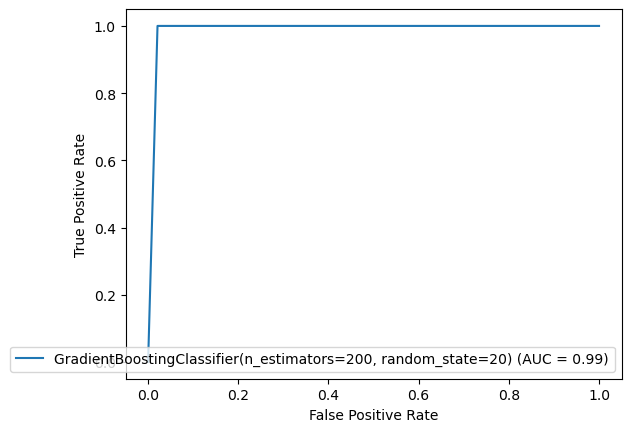

In [227]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y1_test,finalpred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()



Here we have plotted the ROC curvefor the final modeland the AUC value for the best model is 99.%

SAVING THE MODEL

In [228]:
import joblib
joblib.dump(Final_model,'Glass_Identification.pkl')

['Glass_Identification.pkl']

PREDICTING THE SAVED MODEL

In [229]:
#Lets load the saved model and get predictions
model=joblib.load("Glass_Identification.pkl")

#prediction
prediction=model.predict(x1_test)

In [230]:
a=np.array(y1_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
88,0,0
89,1,1
90,1,1
91,1,1


In [ ]:
#FINISH